# Python+比特币+简单海龟策略
##### by 段小手

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'#非MAC不需要这一行

In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 150

In [33]:
end = datetime.today()
start = datetime(end.year, end.month-3, end.day)
symbol = 'btc-usd'

In [43]:
tickers = yf.Ticker(symbol)
data = tickers.history(start=start, end=end, interval = '1h')
data = data.drop(['Dividends', 'Stock Splits'], axis=1)
data.tail()

,Open,High,Low,Close,Volume
2021-05-19 14:00:00+01:00,35271.363281,37344.179688,30681.496094,35916.109375,26626588672
2021-05-19 15:00:00+01:00,35945.042969,37191.406250,34241.507812,37148.300781,13075603456
2021-05-19 16:00:00+01:00,37515.015625,37807.445312,36595.808594,37491.144531,11192246272
2021-05-19 17:00:00+01:00,37302.242188,37302.242188,36947.320312,36947.320312,0
2021-05-19 17:08:02+01:00,36950.539062,36950.539062,36950.539062,36950.539062,0


In [44]:
data.index = data.index.tz_convert('Asia/Shanghai') 
data['log_rtn'] = np.log(data['Close']/data['Close'].shift(1))
data.tail()

,Open,High,Low,Close,Volume,log_rtn
2021-05-19 21:00:00+08:00,35271.363281,37344.179688,30681.496094,35916.109375,26626588672,0.044402
2021-05-19 22:00:00+08:00,35945.042969,37191.406250,34241.507812,37148.300781,13075603456,0.033732
2021-05-19 23:00:00+08:00,37515.015625,37807.445312,36595.808594,37491.144531,11192246272,0.009187
2021-05-20 00:00:00+08:00,37302.242188,37302.242188,36947.320312,36947.320312,0,-0.014612
2021-05-20 00:08:02+08:00,36950.539062,36950.539062,36950.539062,36950.539062,0,0.000087


In [50]:
data['ceiling'] = data['Close'].shift(1).rolling(7*24).max()
data['floor'] = data['Close'].shift(1).rolling(7*24).min()
data.tail()

,Open,High,Low,Close,Volume,log_rtn,ceiling,floor,long,short
2021-05-19 21:00:00+08:00,35271.363281,37344.179688,30681.496094,35916.109375,26626588672,0.044402,56735.234375,34356.25,False,False
2021-05-19 22:00:00+08:00,35945.042969,37191.406250,34241.507812,37148.300781,13075603456,0.033732,56134.355469,34356.25,False,False
2021-05-19 23:00:00+08:00,37515.015625,37807.445312,36595.808594,37491.144531,11192246272,0.009187,55544.695312,34356.25,False,False
2021-05-20 00:00:00+08:00,37302.242188,37302.242188,36947.320312,36947.320312,0,-0.014612,54905.117188,34356.25,False,False
2021-05-20 00:08:02+08:00,36950.539062,36950.539062,36950.539062,36950.539062,0,0.000087,54879.421875,34356.25,False,False


In [53]:
data['long'] = data['Close']>data['ceiling']*1.05
data['short'] = data['Close']<data['floor']*0.95
data.tail()

,Open,High,Low,Close,Volume,log_rtn,ceiling,floor,long,short
2021-05-19 21:00:00+08:00,35271.363281,37344.179688,30681.496094,35916.109375,26626588672,0.044402,56735.234375,34356.25,False,False
2021-05-19 22:00:00+08:00,35945.042969,37191.406250,34241.507812,37148.300781,13075603456,0.033732,56134.355469,34356.25,False,False
2021-05-19 23:00:00+08:00,37515.015625,37807.445312,36595.808594,37491.144531,11192246272,0.009187,55544.695312,34356.25,False,False
2021-05-20 00:00:00+08:00,37302.242188,37302.242188,36947.320312,36947.320312,0,-0.014612,54905.117188,34356.25,False,False
2021-05-20 00:08:02+08:00,36950.539062,36950.539062,36950.539062,36950.539062,0,0.000087,54879.421875,34356.25,False,False


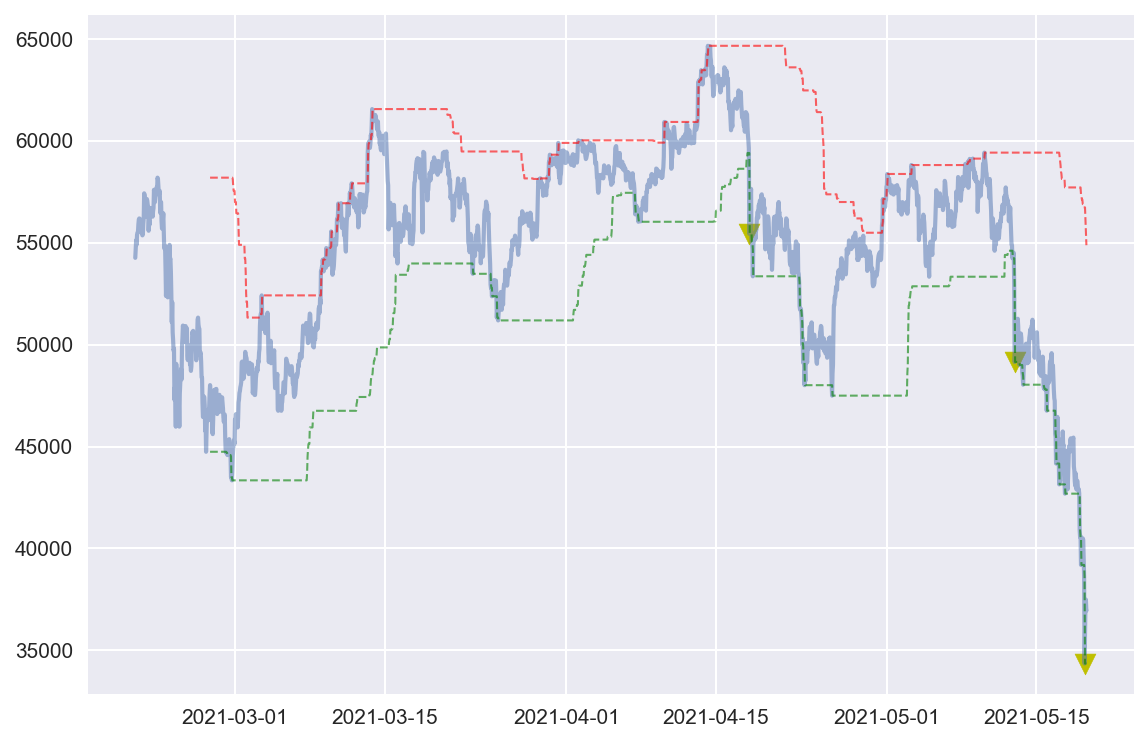

In [55]:
plt.figure(figsize=(9,6))
#绘制价格的折线图
plt.plot(data['Close'],lw=2, alpha=0.5)
#绘制唐奇安通道上沿
plt.plot(data['ceiling'],lw=1, ls='--',c='r', alpha=0.6)
#绘制唐奇安通道下沿
plt.plot(data['floor'],lw=1,ls='--',c='g', alpha=0.6)
#标出做多订单，用正三角标记
plt.scatter(data.loc[data.long==True].index,
           data['Close'][data.long==True],
           marker='^',s=100,color='r',label='long')
#标出做空订单，用倒三角标记
plt.scatter(data.loc[data.short==True].index,
           data['Close'][data.short==True],
           marker='v',s=100,color='y',label='Short')

## 觉得有用就请——
# <font color=#FF0000> 关注、支持、点赞、收藏吧</font>

## 代码下载地址：
## https://github.com/dynhyper/algo-trading/blob/main/simple_turtle.ipynb